In [ ]:
pip install -q sklearn

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset.
dftrain = pd.read_csv('https://raw.githubusercontent.com/RDPerera/DataStrome2.0/main/Hotel-A-train.csv?token=AJMW5LYBN6I2VYXV4QMNYTTAKVKU6') # training data
dfeval = pd.read_csv('https://raw.githubusercontent.com/RDPerera/DataStrome2.0/main/Hotel-A-validation.csv?token=AJMW5L5MIMEUR4EDOOLVKATAKVLFY') # testing data
dftrain.to_csv('trainDOr.csv')
#dftrain.head()
dftrain['Expected_checkin'] = pd.to_datetime(dftrain['Expected_checkin'],format = '%m/%d/%Y',errors = 'coerce')
dftrain['Expected_checkout'] = pd.to_datetime(dftrain['Expected_checkout'],format = '%m/%d/%Y',errors = 'coerce')
dftrain['Booking_date'] = pd.to_datetime(dftrain['Booking_date'],format = '%m/%d/%Y',errors = 'coerce')

dftrain['Total_Days_In_Hotel'] = pd.Series(delta.days for delta in (dftrain['Expected_checkout']-dftrain['Expected_checkin']))
dftrain['Gap_Booking_Checkin'] = pd.Series(delta.days for delta in (dftrain['Expected_checkin']-dftrain['Booking_date']))
dftrain['Gap_Booking_Checkout'] = pd.Series(delta.days for delta in (dftrain['Expected_checkout']-dftrain['Booking_date']))

dftrain['Expected_checkin_Year'] = dftrain['Expected_checkin'].dt.year
dftrain['Expected_checkin_Month'] = dftrain['Expected_checkin'].dt.month
dftrain['Expected_checkin_Day'] = dftrain['Expected_checkin'].dt.day

dftrain['Expected_checkout_Year'] = dftrain['Expected_checkout'].dt.year
dftrain['Expected_checkout_Month'] = dftrain['Expected_checkout'].dt.month
dftrain['Expected_checkout_Day'] = dftrain['Expected_checkout'].dt.day

dftrain['Booking_date_Year'] = dftrain['Booking_date'].dt.year
dftrain['Booking_date_Month'] = dftrain['Booking_date'].dt.month
dftrain['Booking_date_Day'] = dftrain['Booking_date'].dt.day

del dftrain["Booking_date"]
del dftrain["Expected_checkout"]
del dftrain["Expected_checkin"]

dfeval['Expected_checkin'] = pd.to_datetime(dfeval['Expected_checkin'],format = '%m/%d/%Y',errors = 'coerce')
dfeval['Expected_checkout'] = pd.to_datetime(dfeval['Expected_checkout'],format = '%m/%d/%Y',errors = 'coerce')
dfeval['Booking_date'] = pd.to_datetime(dfeval['Booking_date'],format = '%m/%d/%Y',errors = 'coerce')

dfeval['Total_Days_In_Hotel'] = pd.Series(delta.days for delta in (dfeval['Expected_checkout']-dfeval['Expected_checkin']))
dfeval['Gap_Booking_Checkin'] = pd.Series(delta.days for delta in (dfeval['Expected_checkin']-dfeval['Booking_date']))
dfeval['Gap_Booking_Checkout'] = pd.Series(delta.days for delta in (dfeval['Expected_checkout']-dfeval['Booking_date']))

dfeval['Expected_checkin_Year'] = dfeval['Expected_checkin'].dt.year
dfeval['Expected_checkin_Month'] = dfeval['Expected_checkin'].dt.month
dfeval['Expected_checkin_Day'] = dfeval['Expected_checkin'].dt.day

dfeval['Expected_checkout_Year'] = dfeval['Expected_checkout'].dt.year
dfeval['Expected_checkout_Month'] = dfeval['Expected_checkout'].dt.month
dfeval['Expected_checkout_Day'] = dfeval['Expected_checkout'].dt.day

dfeval['Booking_date_Year'] = dfeval['Booking_date'].dt.year
dfeval['Booking_date_Month'] = dfeval['Booking_date'].dt.month
dfeval['Booking_date_Day'] = dfeval['Booking_date'].dt.day

del dfeval["Booking_date"]
del dfeval["Expected_checkout"]
del dfeval["Expected_checkin"]
dftrain.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Total_Days_In_Hotel,Gap_Booking_Checkin,Gap_Booking_Checkout,Expected_checkin_Year,Expected_checkin_Month,Expected_checkin_Day,Expected_checkout_Year,Expected_checkout_Month,Expected_checkout_Day,Booking_date_Year,Booking_date_Month,Booking_date_Day
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,2,2,0,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218,1,41,42,2015,7,1,2015,7,2,2015,5,21
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,3,3,0,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185,1,36,37,2015,7,1,2015,7,2,2015,5,26
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,3,3,0,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119,4,3,7,2015,7,2,2015,7,6,2015,6,29
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,4,3,0,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144,1,12,13,2015,7,2,2015,7,3,2015,6,20
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,1,1,0,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242,1,13,14,2015,7,3,2015,7,4,2015,6,20


In [ ]:
del dfeval["Reservation-id"]
del dftrain["Reservation-id"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()



genre_labels = gle.fit_transform(dftrain['Ethnicity'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Ethnicity'] = genre_labels

genre_labels = gle.fit_transform(dftrain['Use_Promotion'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Use_Promotion'] = genre_labels

genre_labels = gle.fit_transform(dftrain['Reservation_Status'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Reservation_Status'] = genre_labels

genre_labels = gle.fit_transform(dftrain['Educational_Level'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Educational_Level'] = genre_labels

genre_labels = gle.fit_transform(dftrain['Income'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Income'] = genre_labels

genre_labels = gle.fit_transform(dftrain['Country_region'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Country_region'] = genre_labels

genre_labels = gle.fit_transform(dftrain['Hotel_Type'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Hotel_Type'] = genre_labels


genre_labels = gle.fit_transform(dftrain['Meal_Type'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Meal_Type'] = genre_labels

genre_labels = gle.fit_transform(dftrain['Visted_Previously'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Visted_Previously'] = genre_labels


genre_labels = gle.fit_transform(dftrain['Previous_Cancellations'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Previous_Cancellations'] = genre_labels

genre_labels = gle.fit_transform(dftrain['Deposit_type'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Deposit_type'] = genre_labels

genre_labels = gle.fit_transform(dftrain['Booking_channel'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Booking_channel'] = genre_labels


genre_labels = gle.fit_transform(dftrain['Required_Car_Parking'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Required_Car_Parking'] = genre_labels

genre_labels = gle.fit_transform(dftrain['Gender'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dftrain['Gender'] = genre_labels


dftrain.head()
dftrain.to_csv('trainD.csv')

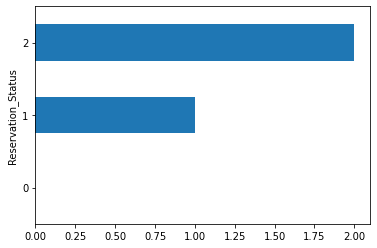

In [ ]:

pd.concat([dftrain], axis=1).groupby('Reservation_Status').Reservation_Status.mean().plot(kind='barh')

In [ ]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()



genre_labels = gle.fit_transform(dfeval['Ethnicity'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Ethnicity'] = genre_labels

genre_labels = gle.fit_transform(dfeval['Use_Promotion'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Use_Promotion'] = genre_labels

genre_labels = gle.fit_transform(dfeval['Reservation_Status'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Reservation_Status'] = genre_labels

genre_labels = gle.fit_transform(dfeval['Educational_Level'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Educational_Level'] = genre_labels

genre_labels = gle.fit_transform(dfeval['Income'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Income'] = genre_labels

genre_labels = gle.fit_transform(dfeval['Country_region'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Country_region'] = genre_labels

genre_labels = gle.fit_transform(dfeval['Hotel_Type'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Hotel_Type'] = genre_labels


genre_labels = gle.fit_transform(dfeval['Meal_Type'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Meal_Type'] = genre_labels

genre_labels = gle.fit_transform(dfeval['Visted_Previously'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Visted_Previously'] = genre_labels


genre_labels = gle.fit_transform(dfeval['Previous_Cancellations'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Previous_Cancellations'] = genre_labels

genre_labels = gle.fit_transform(dfeval['Deposit_type'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Deposit_type'] = genre_labels

genre_labels = gle.fit_transform(dfeval['Booking_channel'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Booking_channel'] = genre_labels


genre_labels = gle.fit_transform(dfeval['Required_Car_Parking'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Required_Car_Parking'] = genre_labels

genre_labels = gle.fit_transform(dfeval['Gender'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dfeval['Gender'] = genre_labels


dfeval.head()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Total_Days_In_Hotel,Gap_Booking_Checkin,Gap_Booking_Checkout,Expected_checkin_Year,Expected_checkin_Month,Expected_checkin_Day,Expected_checkout_Year,Expected_checkout_Month,Expected_checkout_Day,Booking_date_Year,Booking_date_Month,Booking_date_Day
0,1,56,3,1,2,3,2,2,2,0,2,0,0,0,0,0,2,1,15,192,2,195,197,2016,8,31,2016,9,2,2016,2,18
1,1,60,2,0,0,3,2,2,2,0,1,1,0,0,2,1,0,0,0,187,4,175,179,2016,8,31,2016,9,4,2016,3,9
2,0,58,1,0,2,1,0,3,1,0,1,0,0,0,1,0,0,1,10,227,1,193,194,2016,9,1,2016,9,2,2016,2,21
3,0,23,2,0,0,0,0,1,2,0,1,1,0,2,1,0,1,1,25,189,2,103,105,2016,8,31,2016,9,2,2016,5,20
4,0,47,1,0,0,2,1,1,1,0,2,1,0,0,2,1,1,1,10,218,1,92,93,2016,8,31,2016,9,1,2016,5,31


In [ ]:
del dfeval["Ethnicity"]
del dftrain["Ethnicity"]

del dfeval["Age"]
del dftrain["Age"]

del dfeval["Meal_Type"]
del dftrain["Meal_Type"]

train=dftrain
test=dfeval
train.head()

dftrain.to_csv('myfile.csv')

In [ ]:
train_y = train.pop('Reservation_Status')
test_y = test.pop('Reservation_Status')
train.head() # the species column is now gone

,Gender,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Total_Days_In_Hotel,Gap_Booking_Checkin,Gap_Booking_Checkout,Expected_checkin_Year,Expected_checkin_Month,Expected_checkin_Day,Expected_checkout_Year,Expected_checkout_Month,Expected_checkout_Day,Booking_date_Year,Booking_date_Month,Booking_date_Day
0,0,1,2,1,1,2,2,0,0,0,0,2,1,1,10,218,1,41,42,2015,7,1,2015,7,2,2015,5,21
1,0,3,1,0,1,3,3,0,0,0,2,2,1,0,0,185,1,36,37,2015,7,1,2015,7,2,2015,5,26
2,0,1,2,0,1,3,3,0,0,0,0,2,1,0,0,119,4,3,7,2015,7,2,2015,7,6,2015,6,29
3,1,0,3,2,0,4,3,0,0,0,2,0,1,1,5,144,1,12,13,2015,7,2,2015,7,3,2015,6,20
4,0,2,0,0,2,1,1,0,0,0,0,1,0,1,10,242,1,13,14,2015,7,3,2015,7,4,2015,6,20


In [ ]:
train.shape  # we have 120 entires with 4 features

(27499, 28)

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='Gender', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Educational_Level', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Country_region', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Hotel_Type', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Adults', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Children', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Babies', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Visted_Previously', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Previous_Cancellations', shape=(1,), default_value=No

In [ ]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp460d04pc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=100000)
# We include a lambda to avoid creating an inner function previously

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp460d04pc/model.ckpt-277428
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 277428...
INFO:tensorflow:Saving checkpoints for 277428 into /tmp/tmp460d04pc/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 277428...
INFO:tensorflow:loss = 0.48982894, step = 277428
INFO:tensorflow:global_step/sec: 128.306
INFO:tensorflow:loss = 0.9875792, step = 277528 (0.784 sec)
INFO:tensorflow:global_step/sec: 152.026
INFO:tensorflow:loss = 0.94941354, step = 277628 (0.657 sec)
INFO:tensorflow:global_step/sec: 154.159
INFO:tensorflow:loss = 0.9857197, step = 277728 (0.649 sec)
INFO:tensorflow:global_s

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-03-13T18:09:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp460d04pc/model.ckpt-377428
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.36016s
INFO:tensorflow:Finished evaluation at 2021-03-13-18:09:55
INFO:tensorflow:Saving dict for global step 377428: accuracy = 0.5856675, average_loss = 0.9560384, global_step = 377428, loss = 0.9551565
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 377428: /tmp/tmp460d04pc/model.ckpt-377428

Test set accuracy: 0.586



In [ ]:
dft = pd.read_csv('https://raw.githubusercontent.com/RDPerera/DataStrome2.0/main/Hotel-A-test.csv?token=AJMW5LZEOACSWXNIP7TAEATAKYN2I') # testing data
#dft = pd.read_csv('https://raw.githubusercontent.com/RDPerera/DataStrome2.0/main/Hotel-A-train.csv?token=AJMW5LYBN6I2VYXV4QMNYTTAKVKU6')

dft['Expected_checkin'] = pd.to_datetime(dft['Expected_checkin'],format = '%m/%d/%Y',errors = 'coerce')
dft['Expected_checkout'] = pd.to_datetime(dft['Expected_checkout'],format = '%m/%d/%Y',errors = 'coerce')
dft['Booking_date'] = pd.to_datetime(dft['Booking_date'],format = '%m/%d/%Y',errors = 'coerce')

dft['Total_Days_In_Hotel'] = pd.Series(delta.days for delta in (dft['Expected_checkout']-dft['Expected_checkin']))
dft['Gap_Booking_Checkin'] = pd.Series(delta.days for delta in (dft['Expected_checkin']-dft['Booking_date']))
dft['Gap_Booking_Checkout'] = pd.Series(delta.days for delta in (dft['Expected_checkout']-dft['Booking_date']))

dft['Expected_checkin_Year'] = dft['Expected_checkin'].dt.year
dft['Expected_checkin_Month'] = dft['Expected_checkin'].dt.month
dft['Expected_checkin_Day'] = dft['Expected_checkin'].dt.day

dft['Expected_checkout_Year'] = dft['Expected_checkout'].dt.year
dft['Expected_checkout_Month'] = dft['Expected_checkout'].dt.month
dft['Expected_checkout_Day'] = dft['Expected_checkout'].dt.day

dft['Booking_date_Year'] = dft['Booking_date'].dt.year
dft['Booking_date_Month'] = dft['Booking_date'].dt.month
dft['Booking_date_Day'] = dft['Booking_date'].dt.day

del dft["Booking_date"]
del dft["Expected_checkout"]
del dft["Expected_checkin"]

from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()



genre_labels = gle.fit_transform(dft['Ethnicity'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Ethnicity'] = genre_labels

genre_labels = gle.fit_transform(dft['Use_Promotion'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Use_Promotion'] = genre_labels


genre_labels = gle.fit_transform(dft['Educational_Level'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Educational_Level'] = genre_labels

genre_labels = gle.fit_transform(dft['Income'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Income'] = genre_labels

genre_labels = gle.fit_transform(dft['Country_region'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Country_region'] = genre_labels

genre_labels = gle.fit_transform(dft['Hotel_Type'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Hotel_Type'] = genre_labels


genre_labels = gle.fit_transform(dft['Meal_Type'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Meal_Type'] = genre_labels

genre_labels = gle.fit_transform(dft['Visted_Previously'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Visted_Previously'] = genre_labels


genre_labels = gle.fit_transform(dft['Previous_Cancellations'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Previous_Cancellations'] = genre_labels

genre_labels = gle.fit_transform(dft['Deposit_type'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Deposit_type'] = genre_labels

genre_labels = gle.fit_transform(dft['Booking_channel'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Booking_channel'] = genre_labels


genre_labels = gle.fit_transform(dft['Required_Car_Parking'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Required_Car_Parking'] = genre_labels

genre_labels = gle.fit_transform(dft['Gender'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dft['Gender'] = genre_labels

del dft["Ethnicity"]

del dft["Age"]

del dft["Meal_Type"]

dft.head()

,Reservation-id,Gender,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Total_Days_In_Hotel,Gap_Booking_Checkin,Gap_Booking_Checkout,Expected_checkin_Year,Expected_checkin_Month,Expected_checkin_Day,Expected_checkout_Year,Expected_checkout_Month,Expected_checkout_Day,Booking_date_Year,Booking_date_Month,Booking_date_Day
0,62931593,0,1,0,2,1,3,3,0,0,0,0,1,1,1,10,153,1,21,22,2016,11,18,2016,11,19,2016,10,28
1,70586099,0,1,0,0,0,2,1,0,0,0,0,2,0,0,0,210,1,104,105,2016,11,18,2016,11,19,2016,8,6
2,4230648,0,1,2,0,1,2,2,0,0,0,0,0,0,1,5,117,3,20,23,2017,4,28,2017,5,1,2017,4,8
3,25192322,0,2,0,2,0,1,3,2,0,0,0,2,1,1,10,107,2,182,184,2016,11,18,2016,11,20,2016,5,20
4,80931528,1,0,0,2,1,3,1,0,0,0,2,0,0,0,0,119,2,18,20,2016,11,18,2016,11,20,2016,10,31


In [ ]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)
f1=open("out.csv","w")
predict = {}
i=0
s=["Canceled","Check-In","No-Show"]
predictions = classifier.predict(input_fn=lambda: input_fn(dft))
for pred_dict in predictions:
  print(dft['Reservation-id'][i],s[int(pred_dict['class_ids'][0])],sep=",",file=f1)
  i+=1

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp460d04pc/model.ckpt-377428
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))